<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据导入-&amp;-可视化" data-toc-modified-id="数据导入-&amp;-可视化-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据导入 &amp; 可视化</a></span></li><li><span><a href="#数据清理" data-toc-modified-id="数据清理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据清理</a></span><ul class="toc-item"><li><span><a href="#for循环写法：" data-toc-modified-id="for循环写法：-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>for循环写法：</a></span></li><li><span><a href="#使用apply代替for循环" data-toc-modified-id="使用apply代替for循环-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>使用apply代替for循环</a></span></li></ul></li><li><span><a href="#构建文档-词语矩阵" data-toc-modified-id="构建文档-词语矩阵-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>构建文档-词语矩阵</a></span></li><li><span><a href="#词频统计(1元组)" data-toc-modified-id="词频统计(1元组)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>词频统计(1元组)</a></span></li><li><span><a href="#分类别词频统计" data-toc-modified-id="分类别词频统计-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>分类别词频统计</a></span><ul class="toc-item"><li><span><a href="#2元组-（Bigram）" data-toc-modified-id="2元组-（Bigram）-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>2元组 （Bigram）</a></span><ul class="toc-item"><li><span><a href="#结论" data-toc-modified-id="结论-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>结论</a></span></li></ul></li><li><span><a href="#3元组" data-toc-modified-id="3元组-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>3元组</a></span><ul class="toc-item"><li><span><a href="#结论" data-toc-modified-id="结论-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>结论</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import matplotlib.pyplot as plt

# 数据导入 & 可视化

In [2]:
# 训练集和停用词
train = pd.read_csv("../data/TrainSet.csv")

In [3]:
train.head()

,content,class
0,为了保障网络安全，维护网络空间主权和国家安全、社会公共利益，保护公民、法人和其他组织的合法权...,法规目的
1,在中华人民共和国境内建设、运营、维护和使用网络，以及网络安全的监督管理，适用本法。,职责区分
2,国家坚持网络安全与信息化发展并重，遵循积极利用、科学发展、依法管理、确保安全的方针，推进网络...,法规倡议
3,国家制定并不断完善网络安全战略，明确保障网络安全的基本要求和主要目标，提出重点领域的网络安全...,法规倡议
4,国家采取措施，监测、防御、处置来源于中华人民共和国境内外的网络安全风险和威胁，保护关键信息基...,职责区分


In [4]:
Y = train['class']

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 输出svg格式

import seaborn as sns
sns.set_style('white')

In [6]:
plt.rcParams['font.sans-serif']=['SimHei'] # 图片中文输出
plt.rcParams['axes.unicode_minus']=False

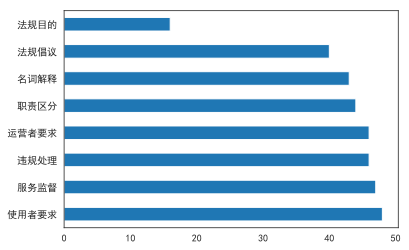

In [7]:
train['class'].value_counts().plot.barh()

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(train['class'])

mapping = dict(zip(le.classes_, le.transform(le.classes_)))
mapping

{'使用者要求': 0,
 '名词解释': 1,
 '服务监督': 2,
 '法规倡议': 3,
 '法规目的': 4,
 '职责区分': 5,
 '运营者要求': 6,
 '违规处理': 7}

In [9]:
train['class'].value_counts()

使用者要求    48
服务监督     47
违规处理     46
运营者要求    46
职责区分     44
名词解释     43
法规倡议     40
法规目的     16
Name: class, dtype: int64

In [10]:
pd.Series(y1).value_counts(normalize=True)

0    0.145455
2    0.142424
7    0.139394
6    0.139394
5    0.133333
1    0.130303
3    0.121212
4    0.048485
dtype: float64

# 数据清理
## for循环写法：

In [11]:
"""
# jieba 分词
cutWords_list = []
for i in train['content']:
 cutWords = [k for k in jieba.cut(i) if k not in stopword_list]
 cutWords_list.append(cutWords)
"""

"\n# jieba 分词\ncutWords_list = []\nfor i in train['content']:\n cutWords = [k for k in jieba.cut(i) if k not in stopword_list]\n cutWords_list.append(cutWords)\n"

## 使用apply代替for循环

In [12]:
from useful_tools import * # 导入我们的自编函数

cutWords_series = train['content'].apply(lambda x: get_cutword(x)) # 得到的是pandas series
cutWords_series.head(10)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xsong\AppData\Local\Temp\jieba.cache
Loading model cost 0.949 seconds.
Prefix dict has been built succesfully.


0    保障 网络安全 维护 空间主权 国家 安全 社会 公共利益 保护 公民 法人 组织 合法权益...
1              中华人民共和国 境内 建设 运营 维护 使用 网络安全 监督 管理 适用 本法
2    国家 坚持 网络安全 信息化 发展 并重 遵循 积极 利用 科学 发展 依法 管理 确保安全...
3    国家 制定 不断完善 网络安全 战略 明确 保障 网络安全 基本 要求 主要 目标 提出 重...
4    国家 采取措施 监测 防御 处置 来源于 中华人民共和国 境内外 网络安全 风险 威胁 保护...
5    国家 倡导 诚实 守信 健康 文明 行为 推动 传播 社会主义 核心 价值观 采取措施 提高...
6    国家 积极开展 网络空间 治理 技术 研发 标准 制定 打击 违法犯罪 方面 国际交流 合作...
7    国家 网信 部门 负责 统筹 协调 网络安全 工作 相关 监督 管理工作 国务院 电信 主管...
8    相关 行业 组织 章程 加强 行业 自律 制定 网络安全 行为规范 指导 会员 加强 网络安...
9    个人 组织 使用 应当 遵守 宪法 法律 遵守 公共秩序 尊重 社会公德 不得 危害 网络安...
Name: content, dtype: object

# 构建文档-词语矩阵

In [13]:
unigram = get_vectorize(cutWords_series)
unigram.head()

,一万元,上网,下列,不得,业务,个人,个人信息,中华人民共和国,主管人员,主管部门,...,进行,违反,违法,通信,通知,遵守,部门,采取,非经营性,鼓励
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# 词频统计(1元组)

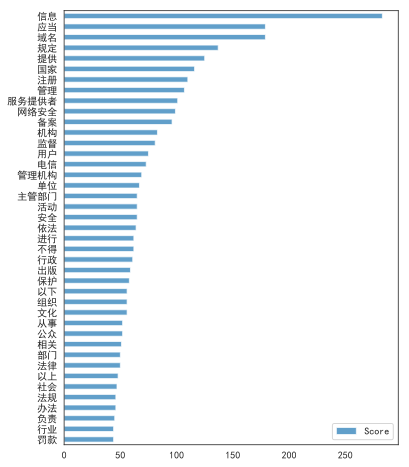

In [14]:
plot_count(unigram,40)

In [15]:
grouped = unigram.groupby(train['class'])
groupesum = grouped.sum()
groupesum

,一万元,上网,下列,不得,业务,个人,个人信息,中华人民共和国,主管人员,主管部门,...,进行,违反,违法,通信,通知,遵守,部门,采取,非经营性,鼓励
class,,,,,,,,,,,,,,,,,,,,,
使用者要求,0,10,9,33,0,16,2,0,0,2,...,7,3,1,10,1,10,0,3,0,0
名词解释,0,7,3,0,1,4,1,3,0,0,...,1,0,0,0,0,0,0,0,7,0
服务监督,0,1,2,6,1,3,4,1,0,29,...,30,5,5,5,2,3,15,5,2,3
法规倡议,0,5,1,0,0,1,3,0,0,4,...,2,0,0,1,0,5,0,1,0,21
法规目的,0,0,0,0,0,0,0,8,0,0,...,0,0,0,0,5,0,0,0,1,0
职责区分,0,0,2,3,3,0,2,10,0,8,...,12,2,0,6,1,2,24,3,6,0
运营者要求,0,3,6,17,4,4,5,1,0,3,...,8,0,0,3,2,5,0,3,11,0
违规处理,21,0,5,3,12,3,2,3,17,19,...,2,32,21,8,8,1,11,8,6,0


# 分类别词频统计

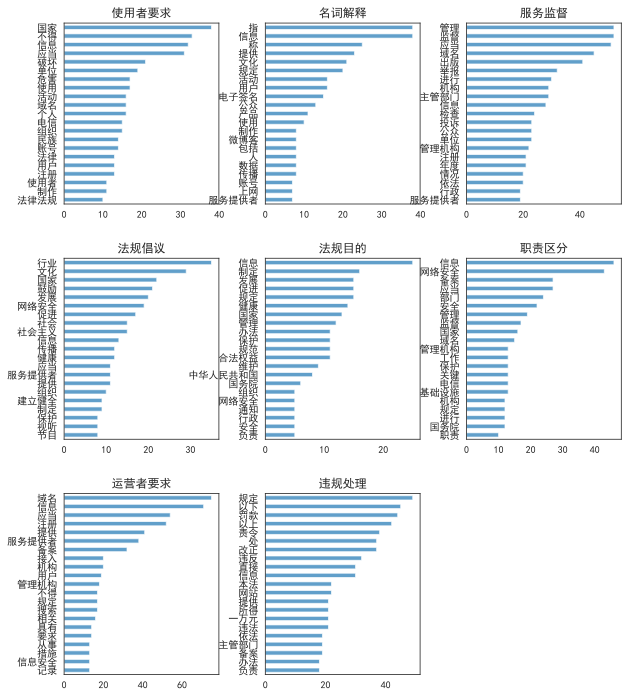

In [16]:
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.figure(1) # 创建第一个画板（figure）
plt.subplot(331) # 第二个画板的第一个子图
plot_count_by(groupesum,0,20)
plt.title(groupesum.index[0])

plt.subplot(332) # 第二个画板的第二个子图
plot_count_by(groupesum,1,20)
plt.title(groupesum.index[1])

plt.subplot(333) 
plot_count_by(groupesum,2,20)
plt.title(groupesum.index[2])

plt.subplot(334)
plot_count_by(groupesum,3,20)
plt.title(groupesum.index[3])

plt.subplot(335) 
plot_count_by(groupesum,4,20)
plt.title(groupesum.index[4])

plt.subplot(336)
plot_count_by(groupesum,5,20)
plt.title(groupesum.index[5])

plt.subplot(337)
plot_count_by(groupesum,6,20)
plt.title(groupesum.index[6])

plt.subplot(338) 
plot_count_by(groupesum,7,20)
plt.title(groupesum.index[7])

plt.show()


## 2元组 （Bigram）

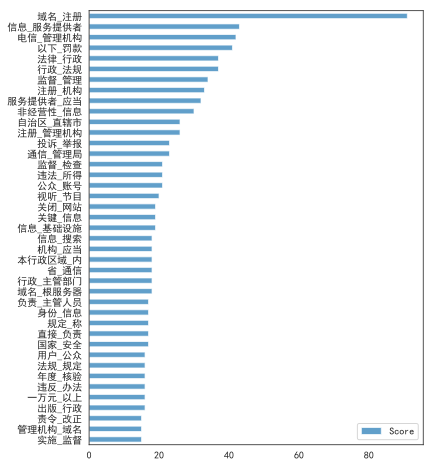

In [17]:
cutWords_series = train['content'].apply(lambda x: generate_ngrams(x,2)) # 得到的是pandas series
bigram = get_vectorize(cutWords_series)
plot_count(bigram,40)

In [18]:
grouped = bigram.groupby(train['class'])
groupesum = grouped.sum()
groupesum

,一万元_以上,上网_营业,个人_不得,个人信息_保护,中华人民共和国_境内,主管人员_直接,主管部门_责令,五十万元_以下,从事_信息,从事_非经营性,...,身份_信息,运行_机构,进行_监督,违反_办法,违反_本法,违法_所得,通信_管理局,部门_依法,限期_改正,非经营性_信息
class,,,,,,,,,,,,,,,,,,,,,
使用者要求,0,5,8,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
名词解释,0,2,0,0,3,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,4
服务监督,0,1,0,0,0,0,0,0,0,0,...,1,8,9,1,0,0,5,5,0,2
法规倡议,0,1,0,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
法规目的,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
职责区分,0,0,0,1,6,0,0,0,2,3,...,2,1,1,1,0,0,6,0,0,6
运营者要求,0,0,0,3,0,0,0,0,3,4,...,12,3,1,0,0,0,3,0,0,11
违规处理,16,0,0,0,0,13,14,8,0,1,...,2,1,0,14,15,21,8,3,10,6


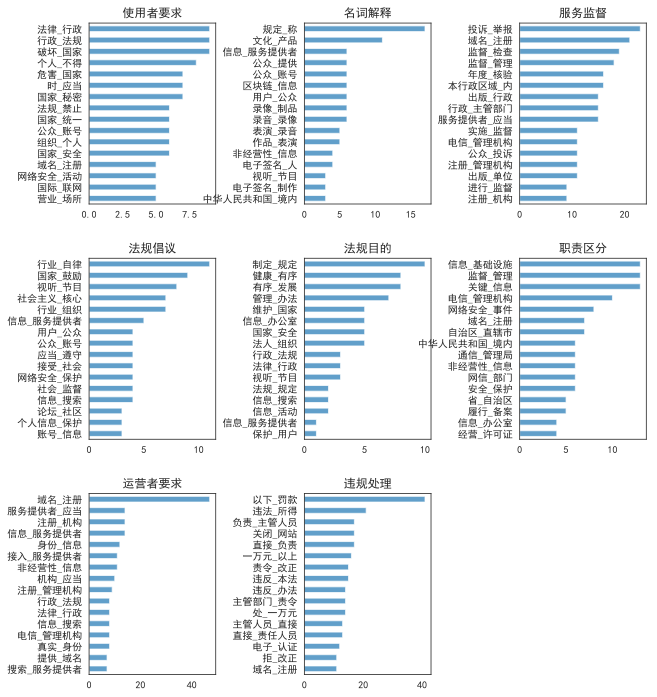

In [19]:
plt.subplots_adjust(hspace=0.3, wspace=0.7)
plt.figure(1) # 创建第一个画板（figure）
plt.subplot(331) # 第二个画板的第一个子图
plot_count_by(groupesum,0,15)
plt.title(groupesum.index[0])

plt.subplot(332) # 第二个画板的第二个子图
plot_count_by(groupesum,1,15)
plt.title(groupesum.index[1])

plt.subplot(333) 
plot_count_by(groupesum,2,15)
plt.title(groupesum.index[2])

plt.subplot(334)
plot_count_by(groupesum,3,15)
plt.title(groupesum.index[3])

plt.subplot(335) 
plot_count_by(groupesum,4,15)
plt.title(groupesum.index[4])

plt.subplot(336)
plot_count_by(groupesum,5,15)
plt.title(groupesum.index[5])

plt.subplot(337)
plot_count_by(groupesum,6,15)
plt.title(groupesum.index[6])

plt.subplot(338) 
plot_count_by(groupesum,7,15)
plt.title(groupesum.index[7])

plt.show()

### 结论
有的单个词词频高是因为它们其实作为二元组一同出现。   
有很多的类别和互联网有关。  
互联网作为一个词出现的频率很高。互联网信息出现的频率也高，也就是说，“互联网”和“信息”二词共现的频率很高。


## 3元组

In [20]:
cutWords_series = train['content'].apply(lambda x: generate_ngrams(x,3)) # 得到的是pandas series
cutWords_series.head(10)

0    保障_网络安全_维护 网络安全_维护_空间主权 维护_空间主权_国家 空间主权_国家_安全 ...
1    中华人民共和国_境内_建设 境内_建设_运营 建设_运营_维护 运营_维护_使用 维护_使用...
2    国家_坚持_网络安全 坚持_网络安全_信息化 网络安全_信息化_发展 信息化_发展_并重 发...
3    国家_制定_不断完善 制定_不断完善_网络安全 不断完善_网络安全_战略 网络安全_战略_明...
4    国家_采取措施_监测 采取措施_监测_防御 监测_防御_处置 防御_处置_来源于 处置_来源...
5    国家_倡导_诚实 倡导_诚实_守信 诚实_守信_健康 守信_健康_文明 健康_文明_行为 文...
6    国家_积极开展_网络空间 积极开展_网络空间_治理 网络空间_治理_技术 治理_技术_研发 ...
7    国家_网信_部门 网信_部门_负责 部门_负责_统筹 负责_统筹_协调 统筹_协调_网络安全...
8    相关_行业_组织 行业_组织_章程 组织_章程_加强 章程_加强_行业 加强_行业_自律 行...
9    个人_组织_使用 组织_使用_应当 使用_应当_遵守 应当_遵守_宪法 遵守_宪法_法律 宪...
Name: content, dtype: object

In [21]:
trigram = get_vectorize(cutWords_series)

grouped = trigram.groupby(train['class'])
groupesum = grouped.sum()

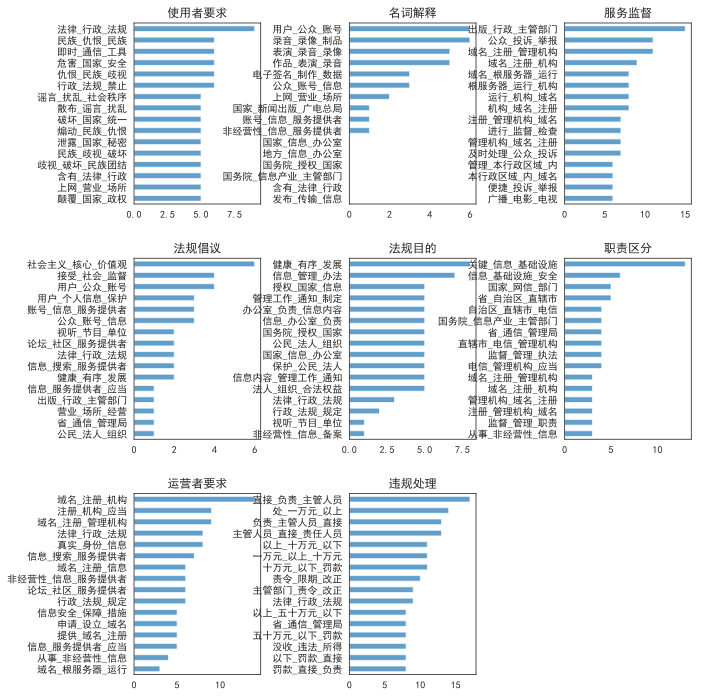

In [22]:
plt.subplots_adjust(hspace=0.3, wspace=0.7)
plt.figure(1) # 创建第一个画板（figure）
plt.subplot(331) # 第二个画板的第一个子图
plot_count_by(groupesum,0,15)
plt.title(groupesum.index[0])

plt.subplot(332) # 第二个画板的第二个子图
plot_count_by(groupesum,1,15)
plt.title(groupesum.index[1])

plt.subplot(333) 
plot_count_by(groupesum,2,15)
plt.title(groupesum.index[2])

plt.subplot(334)
plot_count_by(groupesum,3,15)
plt.title(groupesum.index[3])

plt.subplot(335) 
plot_count_by(groupesum,4,15)
plt.title(groupesum.index[4])

plt.subplot(336)
plot_count_by(groupesum,5,15)
plt.title(groupesum.index[5])

plt.subplot(337)
plot_count_by(groupesum,6,15)
plt.title(groupesum.index[6])

plt.subplot(338) 
plot_count_by(groupesum,7,15)
plt.title(groupesum.index[7])

plt.show()

### 结论
从3元组中发现区别，比方说互联网_信息_搜索 和 互联网_信息_服务 的区别